<a href="https://colab.research.google.com/github/Maredipinkydimakatso/jhb-ss3-classification-Repo/blob/master/Classification_submission_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Framework" data-toc-modified-id="Framework-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Framework</a></span></li><li><span><a href="#Valuation" data-toc-modified-id="Valuation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Valuation</a></span></li></ul></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Distribution" data-toc-modified-id="Distribution-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Distribution</a></span></li><li><span><a href="#Writing-Characteristics" data-toc-modified-id="Writing-Characteristics-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Writing Characteristics</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Anti" data-toc-modified-id="Anti-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Anti</a></span></li><li><span><a href="#Neutral" data-toc-modified-id="Neutral-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Neutral</a></span></li><li><span><a href="#Pro" data-toc-modified-id="Pro-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Pro</a></span></li><li><span><a href="#News" data-toc-modified-id="News-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>News</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Data-Prepocessing" data-toc-modified-id="Data-Prepocessing-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Prepocessing</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-6.2.2.1"><span class="toc-item-num">6.2.2.1&nbsp;&nbsp;</span>LinearSVC</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-6.2.2.2"><span class="toc-item-num">6.2.2.2&nbsp;&nbsp;</span>SVC</a></span></li></ul></li><li><span><a href="#KNearest-Neighbors" data-toc-modified-id="KNearest-Neighbors-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>KNearest Neighbors</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Multinomial-Naive-Bayes" data-toc-modified-id="Multinomial-Naive-Bayes-6.2.4.1"><span class="toc-item-num">6.2.4.1&nbsp;&nbsp;</span>Multinomial Naive Bayes</a></span></li><li><span><a href="#Complement-Naive-Bayes" data-toc-modified-id="Complement-Naive-Bayes-6.2.4.2"><span class="toc-item-num">6.2.4.2&nbsp;&nbsp;</span>Complement Naive Bayes</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.2.5"><span class="toc-item-num">6.2.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-6.2.6"><span class="toc-item-num">6.2.6&nbsp;&nbsp;</span>Neural Networks</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.7"><span class="toc-item-num">6.2.7&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Ensemble-models" data-toc-modified-id="Ensemble-models-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ensemble models</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#VotingClassifier" data-toc-modified-id="VotingClassifier-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>VotingClassifier</a></span></li><li><span><a href="#BaggingClassifier" data-toc-modified-id="BaggingClassifier-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>BaggingClassifier</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#Balancing-the-data" data-toc-modified-id="Balancing-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Balancing the data</a></span><ul class="toc-item"><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>SMOTE</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

<a href="https://colab.research.google.com/github/Maredipinkydimakatso/jhb-ss3-classification-Repo/blob/master/Classification_submission_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Organizations around the world are focused on reducing the amount of environmental impact that is caused by the products they produce. These organizations have taken the responsibility to reduce their carbon footprint, however, there are some people who believe that it is not their responsibility to follow suit, more like climate change is a hoax and all these enviromental changes taking are just natural. 

# Introduction

## Problem Statement

## Framework

EDSA has tasked the group in creating a Machine Learning model that is able to identify the sentiment group each person belongs to based on their tweet message. Accurate predictions from this model will enable companies to familiarize themselves with the overall sentiment of a broader population hence enabling access to insights and developing marketing strategies.

The overall analytical framework that was followed is that data was presented to us which contained tweets about climate change collected from 27 April 2015 till 21 Feb 2018. Data was split into train and test data and the machine learning model was trained using only train data and was tested with the test data. Various models were tested to determine the best performing model, the models ranged from Linear Support Vector Machines, Complement Naive Bayes, ensemble models such as Voting Classifier, and Bagging Classifier, and Neural Networks.

## Valuation

The performance of the model was based on how well the model generalizes between different sentiment groups, this was clearly captured by using the F1-score as the valuation metric.

$$F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$$

whereby:

$$Precision = \frac{TP}{TP + FP}$$ <br>

$$Recall = \frac{TP}{TP + FN}$$ <br>

$TP$ - True Positives <br>

$FP$ - False Positives <br>

$FN$ - False Negatives

# Libraries

In [149]:
# standard libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='white')

# text analysis libraries
import re
import spacy
import string
import emoji

# model building and valuation libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Sampling 
from sklearn.utils import resample, shuffle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Neural Networks
# from tensorflow.keras.metrics import Precision, Recall
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM
# from tensorflow.keras.callbacks import EarlyStopping

# other libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading a spacy English dictionary for NLP
nlp = spacy.load('en_core_web_md')

# Data

## Overview

In [40]:
df = pd.read_csv('train.csv')

In [41]:
# Check the first five rows of the dataframe
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.8+ KB


The data frame consists of three columns, sentiment which is an interger value refering to the tweet class.

| **Class** | **Description** |
| :----------: | :------------- |
| 2 | **News:** the tweet links to factual news about climate change |
| 1 | **Pro:** the tweet supports the belief of man-made climate change |
| 0 | **Neutral:** the tweet neither supports nor refutes the belief of man-made climate change |
| -1 | **Anti:** the tweet does not believe in man-made climate change |

source: https://www.kaggle.com/c/climate-change-belief-analysis/data

The message column is in text format for tweets collected from April 2015 to February 2018 on people expressing the belief 
about man-made climate change. The tweetid is a unique integer value corresponding to the tweet message.

In [6]:
print(f'The dataframe consists of {len(df)} twitter messages.')

The dataframe consists of 15819 twitter messages.


## Missing values

In [7]:
# Check for NaN entries
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are currently no missing values in the dataset.

In [8]:
# Sometimes empty strings can be regarded as not being null, therefore there has to be a check for empty strings message column.
blanks = []
for index, sentiment, message, tweetid in df.itertuples():
    if message.isspace():
        blanks.append(index)

In [9]:
blanks

[]

Similarly, there appears to be no empty strings in the dataset.

## Duplicates

In [10]:
# Original length of dataset 
original_len = len(df)

In [11]:
original_len

15819

In [12]:
all_duplicates = df[df.duplicated(['message'])]

In [13]:
all_duplicates.head(10)

,sentiment,message,tweetid
51,1,RT @StephenSchlegel: she's thinking about how ...,785499
70,1,"RT @kelkulus: Irony: Florida, a state in dange...",857540
98,1,RT @StephenSchlegel: she's thinking about how ...,603318
112,1,RT @SenSanders: We have a president-elect who ...,664093
122,1,RT @StephenSchlegel: she's thinking about how ...,97375
123,1,RT @SethMacFarlane: HRC proposes installing ha...,383885
142,1,RT @StephenSchlegel: she's thinking about how ...,188844
184,1,RT @StephenSchlegel: she's thinking about how ...,990837
224,1,RT @StephenSchlegel: she's thinking about how ...,80936
240,1,RT @StephenSchlegel: she's thinking about how ...,385351


In [14]:
len(all_duplicates)

1590

There are 1590 messages which are duplicated amongst each other in terms of the message column only.

In [15]:
duplicates = df[df.duplicated(['sentiment','message'])]

In [16]:
len(duplicates)

1586

There are 1586 messages which are duplicated both in sentiment and message.

In [17]:
print(f"Therefore {len(all_duplicates) - len(duplicates)} of the rows are duplicate messages but not sharing the\
 same sentiment, therefore they will all be dropped.")

Therefore 4 of the rows are duplicate messages but not sharing the same sentiment, therefore they will all be dropped.


In [18]:
# Creating a list of the indexes of duplicated messages not sharing the same sentiment.
not_matching = [index for index in all_duplicates.index if index not in duplicates.index]
not_matching

[5393, 10351, 12001, 14103]

In [19]:
# Creating a list of the not_matching indexes and their counterpart 
removal_list = []
for index in not_matching:
    remove = df[df.loc[:,'message'] == df.loc[index, 'message']].index.to_list()
    removal_list += remove

In [20]:
print("These is a list of indexes that have a tweet message duplicated but not sharing the same sentiment.")
removal_list

These is a list of indexes that have a tweet message duplicated but not sharing the same sentiment.


[258, 5393, 2390, 10351, 8446, 12001, 9141, 14103]

In [21]:
# View of these messages
df.loc[removal_list, :]

,sentiment,message,tweetid
258,-1,RT @Uniocracy: They'll tell you theyre doing i...,529327
5393,0,RT @Uniocracy: They'll tell you theyre doing i...,723133
2390,2,RT @Channel4News: .@LeoDiCaprio calls on citiz...,460524
10351,1,RT @Channel4News: .@LeoDiCaprio calls on citiz...,93815
8446,0,RT @realDonaldTrump: Where the hell is global ...,228082
12001,-1,RT @realDonaldTrump: Where the hell is global ...,663534
9141,0,RT @COP22: In 4 days the most ambitious climat...,407156
14103,1,RT @COP22: In 4 days the most ambitious climat...,357058


In [22]:
# Dropping the duplicated messages not sharing the same sentiment. 
df.drop(removal_list, inplace=True)

The remaining duplicated messages, that is those that share the same sentiment, are also dropped but with the first of the duplicates being retained. 

In [23]:
df.drop_duplicates('message', inplace=True)

In [24]:
# Check if there are any duplicates remaining
df[df.duplicated(['message'])]

,sentiment,message,tweetid


There appears to be no more duplicated messages in the in the dataset. 

In [25]:
# Length of dataset without duplicates
new_len = len(df)

In [26]:
print(f'After removing the duplicates, the dataset has {new_len} remaining entries.\
 This accounts for {100 * new_len / original_len:.1f}% of the original dataset.')

After removing the duplicates, the dataset has 14225 remaining entries. This accounts for 89.9% of the original dataset.


# Exploratory Data Analysis

In this section we will take a closer look at our data to check for obvious and hidden underlying clues and relationships that exist within our differrent classes. Our problem is a multiclass classification problem with only 4 classes so in order for us to distinguish between the classes we need to figure out what makes each classs unique.

## Overview

### Distribution

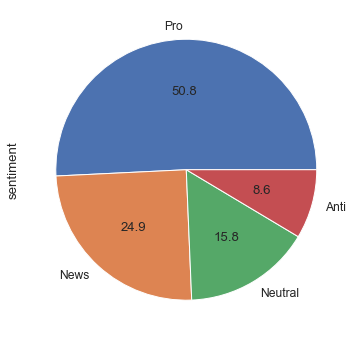

In [27]:
# Percentage split of the data
plt.figure(figsize=(6,6))
sns.set(font_scale=1.1)
df['sentiment'].value_counts().plot(kind='pie', autopct='%.1f', labels=['Pro','News','Neutral','Anti']);

Based on the pie chart above, 50.8% of the tweets supports the belief of man-made climate change **(Pro)**, 24.9% are based on factual news about climate change **(News)**, 15.8% of the tweets are rather neutral on the subject **(Neutral)**, and 8.6% do not believe in man-made climate change **(Anti)**. Looking at this distribution of the dataset based on sentiment classes, it appears that the data is unbalanced. Having an unbalanced dataset introduces bias within the data, depending on the application of the model and how critical the classification, we can either keep the data as is or use data balancing methods like upsampling, down sampling and Smote.

### Writing Characteristics

To avoid any data leakage to the test data when performing a train test split, a copy of the dataframe is created to ensure that the removal of retweets (RT) and urls (https..) does not affect the original database. The reason being that the this process will be part of the data cleaning pipeline when cleaning the X_train database. Cleaning a copy of the database will only help in doing word cloud visualizations. 

In [129]:
df_copy = df.copy()

In [130]:
# Check for presence of urls
def url_extractor(text):
    """
    Returns a binary output identifying the presence of a referenced
    url in a message
    
    Parameters
    -----------
    text: str
        A text message
        
    Returns
    --------
    int
        1 if a url is present in the text and 0 if there is no url
    """
    
    pattern = r'https?\W+\S+' # Search for a website in text
    
    if re.search(pattern, text):
        return 1
    else:
        return 0

In [131]:
df_copy['url'] = df_copy['message'].apply(url_extractor)

In [132]:
df_copy.head()

,sentiment,message,tweetid,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,1,It's not like we lack evidence of anthropogeni...,126103,0
2,2,RT @RawStory: Researchers say we have three ye...,698562,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,0


The presence of a url in a tweet is marked by the number 1, whereas if the tweet does not have url, it is marked by zero. Below is the ratio of the presence of urls in each sentiment group.  

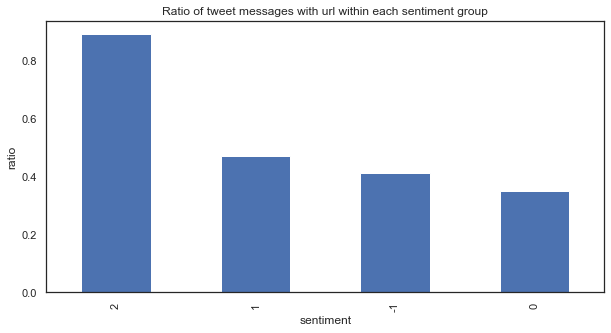

In [136]:
plt.figure(figsize=(10, 5))
df_copy.groupby('sentiment')['url'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('ratio')
plt.title('Ratio of tweet messages with url within each sentiment group');

This makes it clear tha the News class puts url's in their message to strengthen the message that they are sending through.

In [137]:
# Remove retweets
def retweet_removal(text):
    """
    Returns a retweet message without the RT
    
    Parameters
    -----------
    text: str
        A text message
    
    Returns
    --------
    str
        A tweet message without the retweet acronym
    """
    if re.match(r"RT\s+", text): # i.e. if text message starts with RT
        text = re.sub(r"RT\s+","", text)

    return text

In [138]:
df_copy['message'] = df_copy['message'].apply(retweet_removal)

In [139]:
# Remove symbols and urls from tweets
def clean_tweets(text):
    """
    Returns a tweet text without the twitter handle, hashtags and urls
    
    Parameters
    -----------
    text: str
        A tweet message
    
    Returns
    --------
    str
        A tweet without a website url, '@' and "#" symbols
    """
    
    pattern = r'@|#|https?\W*\S+'
    
    clean_text = re.sub(pattern, "", text).strip()
    
    return clean_text

In [140]:
df_copy['message'] = df_copy['message'].apply(clean_tweets)

In [141]:
def wordcount(data):
    """
    Returns a graph showing distribution of word count for each sentiment group.

    Parameters
    -----------
    data: DataFrame
        Dataframe consisting of tweet messages abd their respective sentiment
        group.
    
    Returns
    --------
    ax : matplotlib Axes
        Axes object with A Catplot showing the distribution of wordcounts in each 
        sentiment group
    """
    
    word_count=data['message'].apply(lambda x: len(x.split()))
    wordcount_sentiment=pd.concat([pd.DataFrame(word_count),data['sentiment']],axis=1)
    ax = sns.catplot(x="sentiment", y="message",kind='boxen', data=wordcount_sentiment)
    plt.ylabel('Word count', fontsize=12);

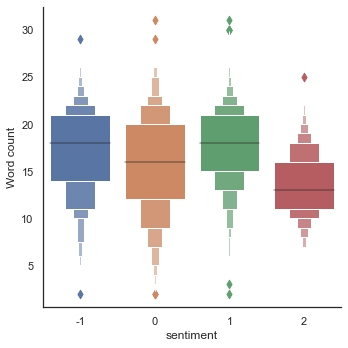

In [142]:
wordcount(df_copy)

Based on the categorical plots above, it appears that based on the median values (solid line), the Anti and Pro regularly express their sentiment in more words as compared to the News and Neutral group. This might be indicative of a strong persona that is in Anti and Pro group, that they feel that they need to say more to get their point across. The News group has the lowest median for the word count which is due to the high number of url extensions that are in that sentiment group as seen in the previous graph on ratio of presence of urls in the tweets. The News group uses website links, articles and past stories to further make their point across, hence their overall lower usage of words. 

In [143]:
# Chracter length distribution
def character_length(data):
    """
    Returns a graph showing distribution of character length on each sentiment

    Parameters
    -----------
    data: DataFrame
        Dataframe consisting of tweet messages abd their respective sentiment
        group.
    
    Returns
    --------
    ax : matplotlib Axes
        Axes object with a line plot showing the distribution of charcater 
        lengths in each sentiment group.
    """
    fig, ax = plt.subplots(figsize=(8, 7))
    charlen=data['message'].str.len()
    charlen_sentiment=pd.concat([pd.DataFrame(charlen),data['sentiment']],axis=1)
    sns.kdeplot(charlen_sentiment['message'][charlen_sentiment['sentiment'] == -1],label='anti')
    sns.kdeplot(charlen_sentiment['message'][charlen_sentiment['sentiment'] == 0],label='neutral')
    sns.kdeplot(charlen_sentiment['message'][charlen_sentiment['sentiment'] == 1],label='pro')
    sns.kdeplot(charlen_sentiment['message'][charlen_sentiment['sentiment'] == 2],label='news')

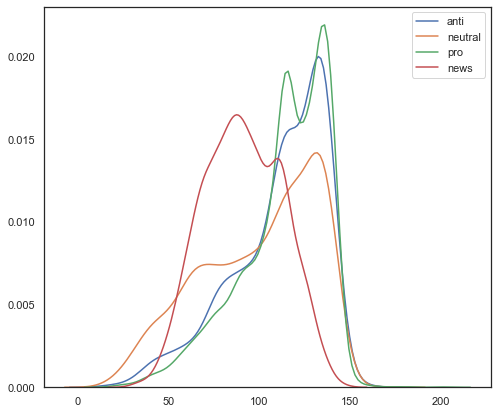

In [144]:
character_length(df_copy)

In [ ]:
# Parts of speech

## Visualizations

In the quest to find out what makes each sentiment class unique, an exploration of the topics each group mentions the most is conducted. This is achieved by extracting the hashtags from the tweets and creating plots of the most mentioned hashtags for each sentiment group. Furthermore, finding out who or what entity is being tagged the most in each sentiment group by extracting the mentioned twitter handles from the tweets could help in identifying the uniqueness of each sentiment group.

The regular expression library is utilized to extract the twitter handles and hashtags, and plot the top most frequent topics and twitter accounts. 

In [30]:
# Create a visualization of the number of tagged twitter handles, and hashtags per sentiment groups
def tweet_occurence_graph(dataframe, sentiment, top_n=5, color='darkblue'):
    """
    Returns a subplot of two horizontal bar graphs of the top most tagged person or organization,
    and top most active topic of interest as identified by hashtags, in a specified sentiment group.
    
    Parameters
    -----------
    dataframe: DataFrame
        Dataframe consisting of tweet messages and their respective sentiment group.
    sentiment: int, str
        A sentiment value based on category
    top_n: int, default=5
        The top n occurence of twitter handle and hashtag.
    color: matplotlib colormap name or object, default='darkblue'
         
    Returns
    --------
    ax : matplotlib Axes
        Axes object with subplots of two horizontal bar graphs
    """
    
    # I.D twitter handle and hashtags patterns
    twitter_handle_pattern = r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))(@[A-Za-z]+[A-Za-z0-9-_]+)' # Disregards emails
    hashtag_pattern = r'(#[A-Za-z]+[A-Za-z0-9-_]+)'
    
    # Filter the dataframe according to the sentiment group
    df_filtered = dataframe[dataframe['sentiment'] == sentiment]
    
    # Create a dictionary of twitter handles and hashtags, and 
    # the corresponding number of occurances per sentiment group
    twitter_handle_frequency = {}
    hashtag_frequency = {}
    
    for tweet in df_filtered['message']:
        
        # Match all the twitter handles in a message
        identified_handle_patterns = re.findall(twitter_handle_pattern, tweet)
        # Match all the hashtags in a message
        identified_hashtag_patterns = re.findall(hashtag_pattern, tweet)
        
        # TWITTER HANDLE
        for item in identified_handle_patterns:
            
            if item in twitter_handle_frequency.keys():
                twitter_handle_frequency[item] += 1
            else:
                twitter_handle_frequency[item] = 1
            
        # HASHTAGS
        for item in identified_hashtag_patterns:
            
            if item in hashtag_frequency.keys():
                hashtag_frequency[item] += 1
            else:
                hashtag_frequency[item] = 1
        
    # Create a temporary dataframes to host the frequency dictionaries 
    # TWITTER HANDLE
    handle_df = pd.DataFrame(
        data=twitter_handle_frequency.values(), 
        index=twitter_handle_frequency.keys(), 
        columns=['Occurences']
    )
    handle_df.sort_values(by='Occurences', ascending=False, inplace=True)
    handle_df = handle_df[:top_n]
    
    # HASHTAGS
    hashtag_df = pd.DataFrame(
        data=hashtag_frequency.values(), 
        index=hashtag_frequency.keys(), 
        columns=['Occurences']
    )
    hashtag_df.sort_values(by='Occurences', ascending=False, inplace=True)
    hashtag_df = hashtag_df[:top_n]
    
    # Sentiment groups
    target = {2:'News', 1:'Pro', 0:'Neutral', -1:'Anti'}
    
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    fig.tight_layout(pad=7.0)
    sns.barplot(x='Occurences', y=handle_df.index, color=color, data=handle_df, ax=ax[0]) # Twitter handle
    sns.barplot(x='Occurences', y=hashtag_df.index, color=color, data=hashtag_df, ax=ax[1]) # Hashtags
    ax[0].set_title(f'Top {top_n} Twitter handles for {target[sentiment]} category')
    ax[1].set_title(f'Top {top_n} Hashtags for {target[sentiment]} category')

### Anti

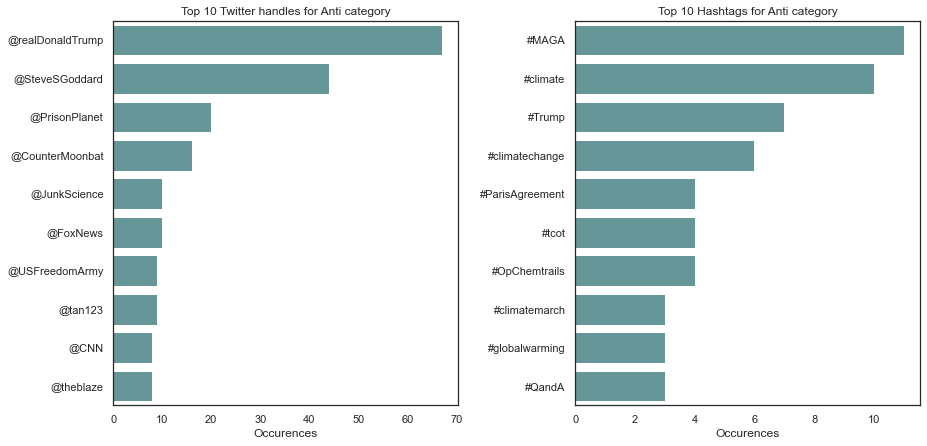

In [113]:
tweet_occurence_graph(df, sentiment=-1, top_n=10, color='cadetblue')

The graph above represent the top 10 most occuring twitter handles within the sentiment group that is Anti [against the notion of] man made climate change. The graph shows that the handle @SteveSGoddord appears the most followed by the handle of U.S President, Donald Trump and then a handle called @PrisonPlanet.

The twitter handle @SteveSGoddard was owned by a man called Tony Heller who describes himself as a whiste blower and an independant thinker who believes that the notion of man made climate change is not entirely true he believes that we are not the primary cause of climate change and that infact that our contribution to it is miniscule.

The president of the United States of America on the other hand has publicly labelled climate change as a hoax.



Trump once said “Nobody really knows if it climate change is real as we can see in our anti class graph he is number one in trends.This has proved to be untrue according to a survey, over 97% of scientists say that climate change was mostly if not all man made.The president of the U.S went as far as branding it’s former president Mr Obama’s climate change legacy as “stupid”.The Obama rule was devised to shut down hundreds of heavily polluting coal-fired power plants and freeze construction of new coal plants, while replacing them with vast wind and solar farms. Which sounded like a great idea to me.These series of tweets lands him on our highest trend on our anti graph.

In [154]:
def plot_wordcloud(data, sentiment):
    """
    Returns Wordcloud plot of top 100 words in our tweets.
    
    Parameters
    -----------
    data: DataFrame 
        A dataframe column that containing tweets.
    sentiment: int, str
        A sentiment group
     
    Returns
    --------
    ax : matplotlib Axes
        A WordCloud showing the common words used used in that sentiment group
    """
    
    # Filter dataframe to reflect the specified sentiment group
    filtered_data = data[data['sentiment'] == sentiment]['message']
    plt.figure(figsize = (15,8))
    plt.imshow(WordCloud(max_words=100 , width=1000 ,height=600).generate(" ".join(filtered_data)), 
               interpolation = 'bilinear')

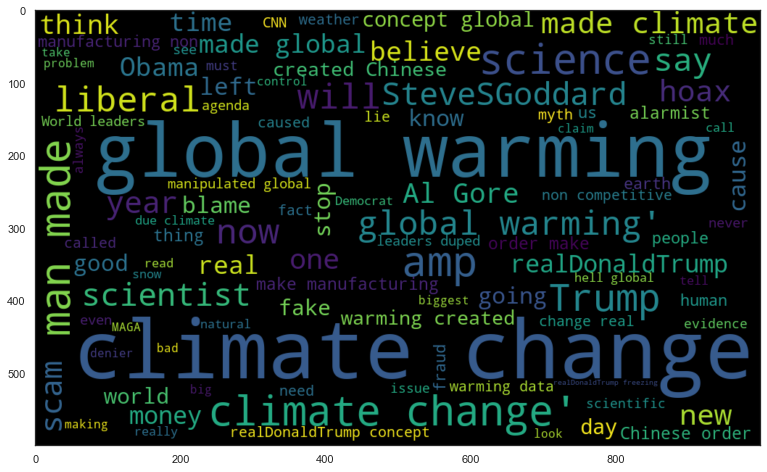

In [155]:
plot_wordcloud(df_copy, -1)

### Neutral

In the neautral class it has been observed that Donald Trump is one of the most mentioned handles followed by the news chanels CNN and fox news respectfully. What we can say is that the neutral group is more interested in factual news and the political view as well.

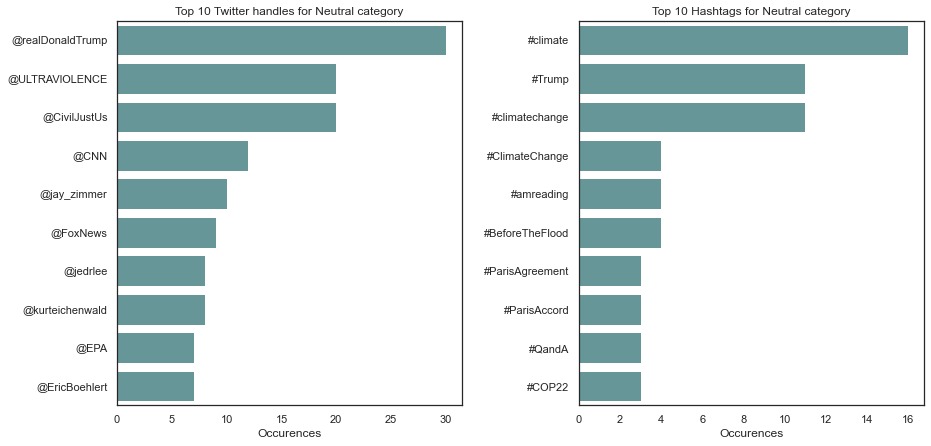

In [114]:
tweet_occurence_graph(df, sentiment=0, top_n=10, color='cadetblue')

As observed in the the graphs above the most mentioned twitter account is that of the United States President Donald Trump and the most discussed topic is climate and climate change.

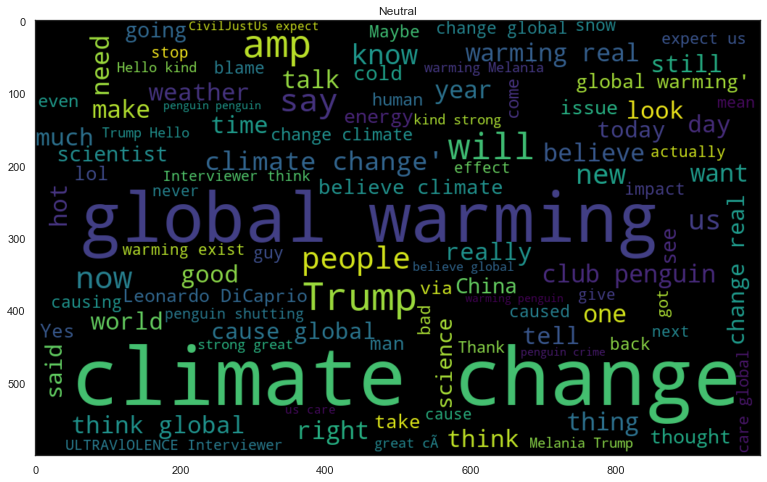

In [157]:
plot_wordcloud(df_copy, 0)

### Pro

In the possitive class where 53% of our data lies if the data represents a sample population it woulld mean that most peoplle in general believe in the notion of man made climate change. We can also see similarly to the other groups that the President is also the most mentioned tweet.

The second and third most mentioned is the new york times, and climateCentral respectively.

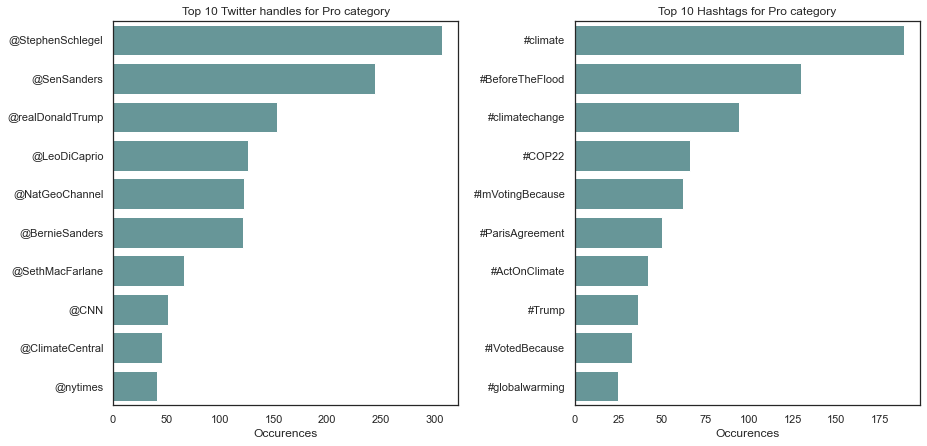

In [115]:
tweet_occurence_graph(df, sentiment=1, top_n=10, color='cadetblue')

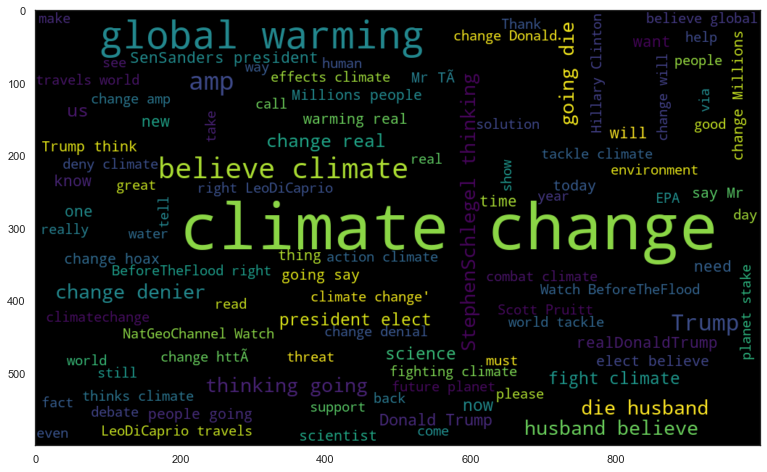

In [152]:
plot_wordcloud(df_copy, 1)

### News

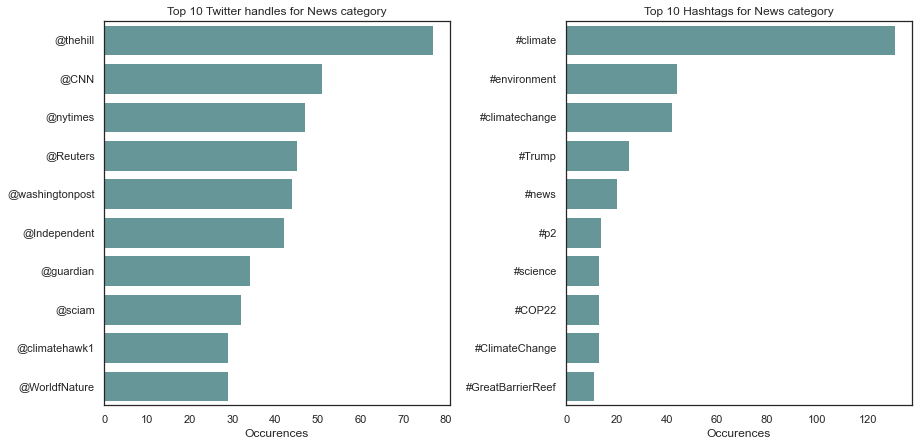

In [116]:
tweet_occurence_graph(df, sentiment=2, top_n=10, color='cadetblue')

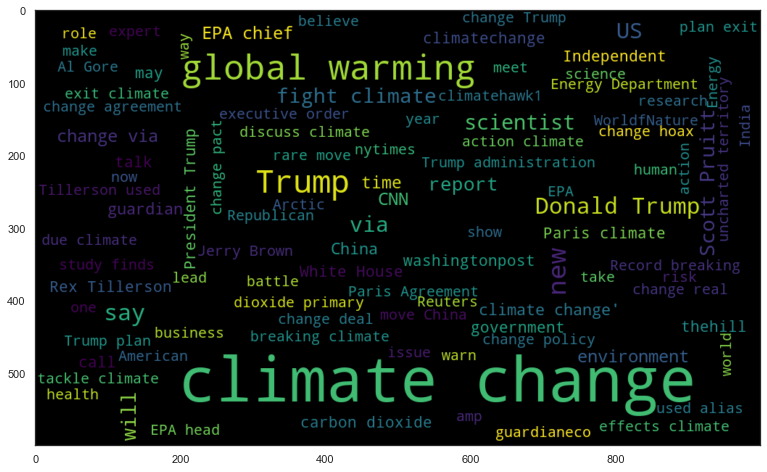

In [153]:
plot_wordcloud(df_copy, 2)

## Feature Engineering

# Modeling

## Data Prepocessing

To avoid any data leakage, the dataset has been split into a training dataset to train the machine learning model and the testing dataset to test the performance of the model.

In [44]:
# Apply train_test_split to prevent any data leakage when constructing the ML model
X = df[['message']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [45]:
# Remove foreign characters
def remove_characters(text):
    """
    Returns a message without any foreign characters, that is those
    that are not in our alphabets, numbering system, and not part of 
    punctuation marks
    
    Parameters
    -----------
    text: str
        A text message
    
    Returns
    --------
    str
        A text message without foreign characters
    """
    
    # Remove unidentifieable letters (i.e. foreign characters)
    local_characters = string.ascii_letters + string.digits + string.punctuation + ' ' 
    # Included spacing at the end so that it can be recorgnized in a string
    
    for char in text:
        if char not in local_characters:
            text = text.replace(char, '')
    
    return text.strip()

In [46]:
# Example message with foreign characters
X_train.iloc[7, 0]

"RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦"

The message has unidentifiable letters which are not part of the English language. This might affect the size of 
the sparse matrix and also affect how the spaCy library reads the message.

In [47]:
# After applying the function
remove_characters(X_train.iloc[7, 0])

"RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoN"

The foreign characters are now removed from the message making the message more readable.

In [48]:
X_train['message'] = X_train['message'].apply(remove_characters)

In [51]:
X_train['message'] = X_train['message'].apply(retweet_removal)

In [54]:
X_train['message'] = X_train['message'].apply(clean_tweets)

In [56]:
# Removing punctuation marks
def remove_punctuations(tweet):
    """
    Returns a tweet without punctuations and words that not in the nltk library

    Parameters
    -----------
    text: str
        A tweet to be examined
        
    Returns
    -------
    str
        A tweet message without any punctuations
    """
    
    for letter in tweet:
        if letter in string.punctuation:
            tweet = tweet.replace(letter, '')    

    return tweet.strip()

In [57]:
X_train['message'] = X_train['message'].apply(remove_punctuations)

To reduce the size of the sparse matrix, lemmatizing the words to their basic form will assist in achieving sparse matrix's reduction.

In [58]:
# Lemmatize words to their basic form
def lemmatizer(text):
    """
    Returns a lemmatized sentence
    
    Parameters
    -----------
    text: str
        A text message
        
    Returns
    --------
    str
        A text message at its most basic form
    """
    
    lemma_words = []
    
    doc = nlp(text.lower())
    
    for token in doc:
        lemma_words.append(token.lemma_)
        
    return ' '.join(lemma_words)

In [59]:
X_train['message'] = X_train['message'].apply(lemmatizer)

## Machine Learning 

The performance of the models is based on the weighted F1-score, this will be identified using the classification report. The confusion matrix will also be displayed in order to identify where the model is performing poorly.

In [275]:
def scoring_metrics(actual, predicted):
    """
    Returns a plot of a confusion matrix plotted on a heatmap as well as 
    a classification report.
    
    Parameters
    -----------
    actual: list
        list of actual sentiment
    predicted: list
        list of predicted sentiment
    
    Results
    --------
    ax : matplotlib Axes
        A heatmap showing percentages for each category on a heatmap
    """
    
    cm = confusion_matrix(actual, predicted)
    perc_cm = np.empty(shape=cm.shape) # Confusion matrix for storing percentages
    
    totals = np.sum(cm, axis=1)
    
    # Calculate ratios row wise
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            perc_cm[row, col] = cm[row, col] / totals[row]
    
    print('Classification Report')
    print(classification_report(actual, predicted))
    print('\n')
    print('Confusion Matrices')
    fig, ax = plt.subplots(ncols=2,figsize=(14,6), sharey=True)
    labels = [-1, 0, 1, 2]
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, yticklabels=labels, xticklabels=labels, ax=ax[0])
    sns.heatmap(perc_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False, yticklabels=labels, xticklabels=labels, ax=ax[1])
    fig.tight_layout(pad=7.0)
    ax[0].set_ylabel("Actual")
    ax[0].set_xlabel("Predicted")
    ax[1].set_xlabel("Predicted")
    ax[0].set_title("Actual count")
    ax[1].set_title("Percentage of row wise actual");

In [76]:
# Storing the F1, precision and recall values
def valuations(actual, predicted):
    """
    Returns the F1, precision and recall of the predicted values
    against actual
    
    Parameters
    -----------
    actual: list
        list of actual sentiment
    predicted: list
        list of predicted sentiment
        
    Returns
    --------
    dict:
        Dictionary containing the f1, precision, and recall score         
    """
    
    f1 = f1_score(actual, predicted, average='weighted')
    precision = precision_score(actual, predicted, average='weighted')
    recall = recall_score(actual, predicted, average='weighted')
    
    return {'f1': f1, 'precision': precision, 'recall': recall} 

The approach followed in valuating the performance of the models is based on testing the performance of the base machine learning model, that is, without any parameters being adjusted and comparing the results will all the other models.

In [62]:
# Create a base model for the machine learning models
def base_model(X_train, y_train, X_test, model):
    """
    Returns the predicted values of the feature being predicted.
    
    Parameters
    -----------
    X_train: DataFrame, pd.Series, np.array
        Training data to train the model
    y_train: list, np.array, DataFrame, pd.Series
        Training labels to train the model
    X_test: DataFrame, pd.Series, np.array
        Testing data having same features as X_train 
        used to generate predictions
    model: 
        Machine Learning model
    
    Returns
    --------
    list:
        Predictions of the target variable
    """
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    return predictions

In order for text messages to serve as input to the Machine Learning models, the text messages have to be converted to numbers using the Term Frequency Inverse Document Frequency Vectorizer.

In [66]:
tfidf = TfidfVectorizer()
X_train_transformed = tfidf.fit_transform(X_train['message'])
X_test_transformed = tfidf.transform(X_test['message'])

### Logistic Regression

In [158]:
logreg = LogisticRegression()

In [71]:
y_pred_logreg = base_model(X_train_transformed, y_train, X_test_transformed, logreg)

Classification Report
              precision    recall  f1-score   support

          -1       0.80      0.15      0.25       388
           0       0.56      0.31      0.40       713
           1       0.73      0.87      0.79      2597
           2       0.67      0.74      0.71      1048

    accuracy                           0.70      4746
   macro avg       0.69      0.52      0.54      4746
weighted avg       0.70      0.70      0.67      4746



Confusion Matrices


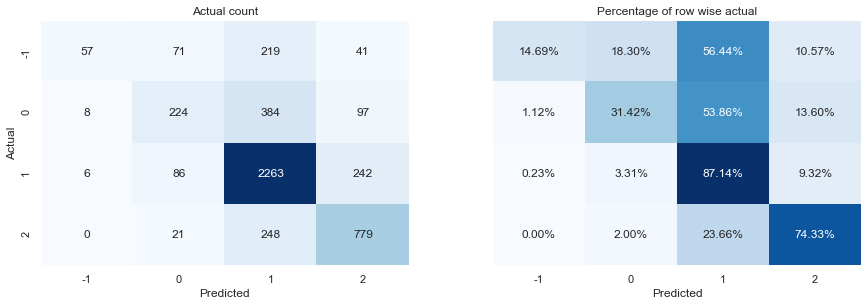

In [276]:
scoring_metrics(y_test, y_pred_logreg)

DISCUSSION ABOUT THE RESULTS
In our case we have the class "Pro" with the most data points this might potentially mean that our model would be biased towards the class "Pro", meaning that our model will be very good at predicting that text belongs to the class "Pro" and very bad at predicting other classes.

In [77]:
logreg_metrics = valuations(y_test, y_pred_logreg)

### Support Vector Machines

#### LinearSVC

In [78]:
linsvc = LinearSVC()

In [79]:
y_pred_linsvc = base_model(X_train_transformed, y_train, X_test_transformed, linsvc)

Classification Report
              precision    recall  f1-score   support

          -1       0.73      0.28      0.41       388
           0       0.50      0.40      0.44       713
           1       0.74      0.84      0.79      2597
           2       0.69      0.70      0.69      1048

    accuracy                           0.70      4746
   macro avg       0.66      0.55      0.58      4746
weighted avg       0.69      0.70      0.68      4746



Confusion Matrices


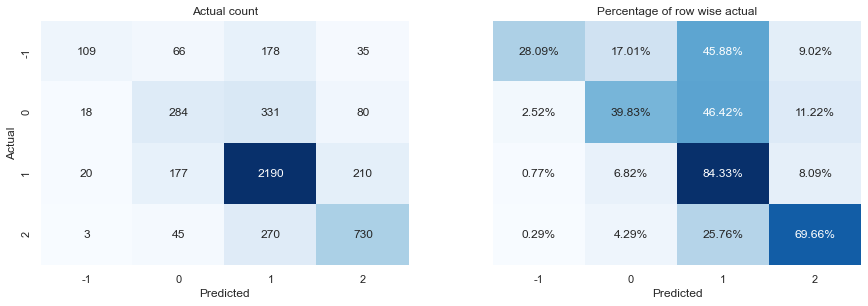

In [277]:
scoring_metrics(y_test, y_pred_linsvc)

DISCUSSION OF RESULTS

In [82]:
linsvc_metrics = valuations(y_test, y_pred_logreg)

#### SVC

In [83]:
svc = SVC()

In [84]:
y_pred_svc = base_model(X_train_transformed, y_train, X_test_transformed, svc)

Classification Report
              precision    recall  f1-score   support

          -1       0.89      0.13      0.23       388
           0       0.68      0.24      0.35       713
           1       0.70      0.90      0.79      2597
           2       0.71      0.75      0.73      1048

    accuracy                           0.71      4746
   macro avg       0.75      0.51      0.53      4746
weighted avg       0.72      0.71      0.67      4746



Confusion Matrices


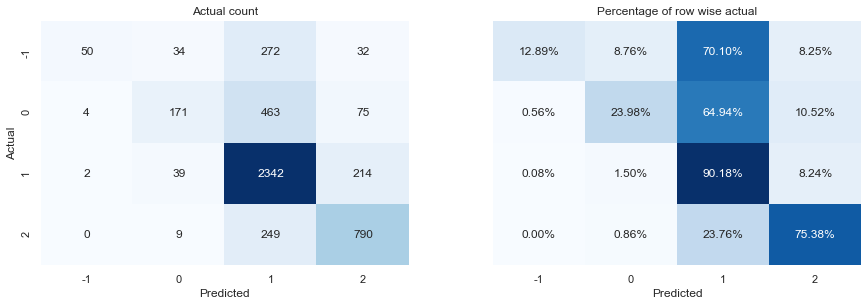

In [278]:
scoring_metrics(y_test, y_pred_svc)

DISCUSSION OF RESULTS

In [86]:
linsvc_metrics = valuations(y_test, y_pred_svc)

### KNearest Neighbors

The KNearest Neigbors will not be tested using the base model, since the model uses the nearest neighbors to determine the prediction of a variable, multiple values of F1-score can be viewed simultaneously by adjusting the number of neighbors and calculating the respective F1-score. This will help in determining how changing the number of nearest naighbors affects the F1-score. 

In [89]:
predictions = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    score = f1_score(y_test, y_pred, average='weighted')
    predictions.append(score)

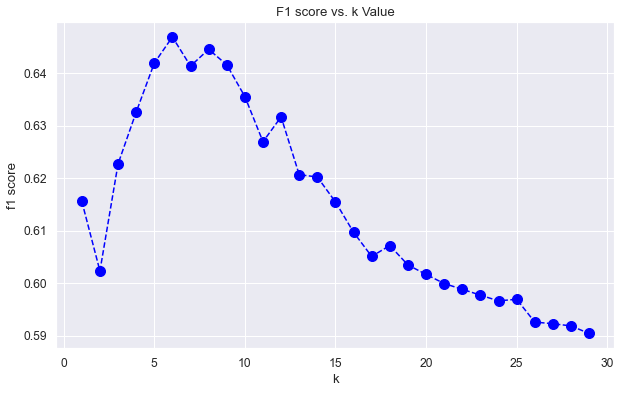

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,30), predictions, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 score vs. k Value')
plt.xlabel('k')
plt.ylabel('f1 score');
# Place a red marker where there's a maximum f1 score achieved

Based on the model the graph above, it appears at around k(number of neighbors)=6, the model generates the highest F1-score. This might be due to the imbalanced data, an increase in the number of neighbors results in more of the opposite sentiment groups infiltrating the nearest space specified by the k value.  

In [266]:
knn = KNeighborsClassifier(n_neighbors=6) 

In [267]:
y_pred_knn = base_model(X_train_transformed, y_train, X_test_transformed, knn)

Classification Report
              precision    recall  f1-score   support

          -1       0.58      0.28      0.38       388
           0       0.48      0.31      0.38       713
           1       0.71      0.80      0.75      2597
           2       0.63      0.71      0.66      1048

    accuracy                           0.66      4746
   macro avg       0.60      0.52      0.54      4746
weighted avg       0.65      0.66      0.65      4746



Confusion Matrices


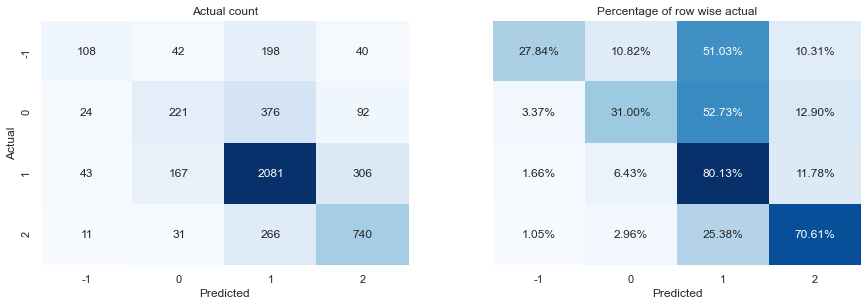

In [279]:
scoring_metrics(y_test, y_pred_knn)

In [269]:
knn_metrics = valuations(y_test, y_pred_knn)

### Naive Bayes

#### Multinomial Naive Bayes

In [91]:
mltnb = MultinomialNB() 

In [92]:
y_pred_mltnb = base_model(X_train_transformed, y_train, X_test_transformed, mltnb)

Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       388
           0       1.00      0.04      0.09       713
           1       0.59      1.00      0.74      2597
           2       0.93      0.32      0.47      1048

    accuracy                           0.62      4746
   macro avg       0.63      0.34      0.33      4746
weighted avg       0.68      0.62      0.52      4746



Confusion Matrices


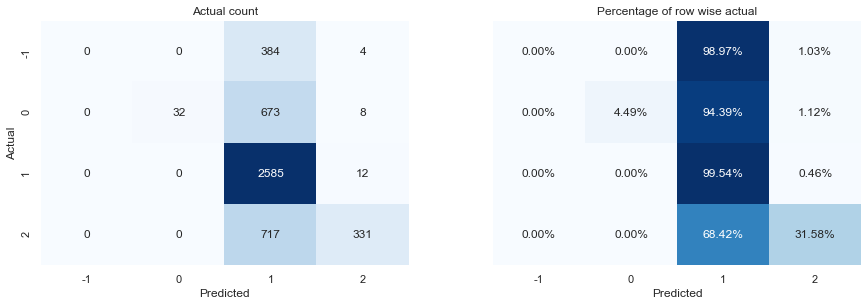

In [280]:
scoring_metrics(y_test, y_pred_mltnb)

Model not suited for imbalanced data

In [271]:
mltnb_metrics = valuations(y_test, y_pred_mltnb)

#### Complement Naive Bayes

In [95]:
cmpnb = ComplementNB()

In [96]:
y_pred_cmpnb = base_model(X_train_transformed, y_train, X_test_transformed, cmpnb)

Classification Report
              precision    recall  f1-score   support

          -1       0.72      0.27      0.39       388
           0       0.65      0.21      0.32       713
           1       0.70      0.87      0.78      2597
           2       0.67      0.74      0.70      1048

    accuracy                           0.69      4746
   macro avg       0.69      0.52      0.55      4746
weighted avg       0.69      0.69      0.66      4746



Confusion Matrices


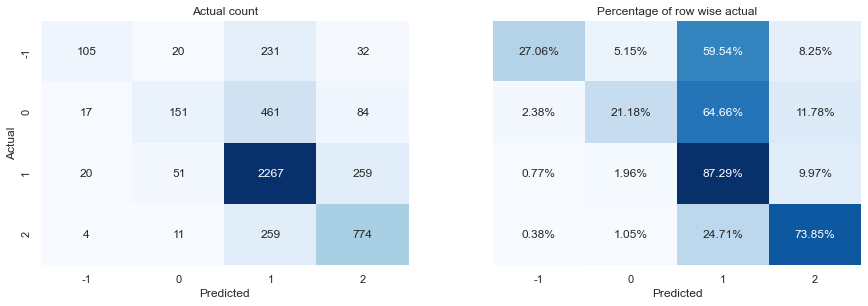

In [281]:
scoring_metrics(y_test, y_pred_cmpnb)

Better performer as compared to MultiNonmial NB

In [98]:
cmpnb_metrics = valuations(y_test, y_pred_cmpnb)

### Decision Tree

In [99]:
dt = DecisionTreeClassifier()

In [100]:
y_pred_dt = base_model(X_train_transformed, y_train, X_test_transformed, dt)

Classification Report
              precision    recall  f1-score   support

          -1       0.21      0.12      0.15       388
           0       0.32      0.28      0.30       713
           1       0.67      0.53      0.59      2597
           2       0.39      0.68      0.50      1048

    accuracy                           0.49      4746
   macro avg       0.40      0.40      0.38      4746
weighted avg       0.52      0.49      0.49      4746



Confusion Matrices


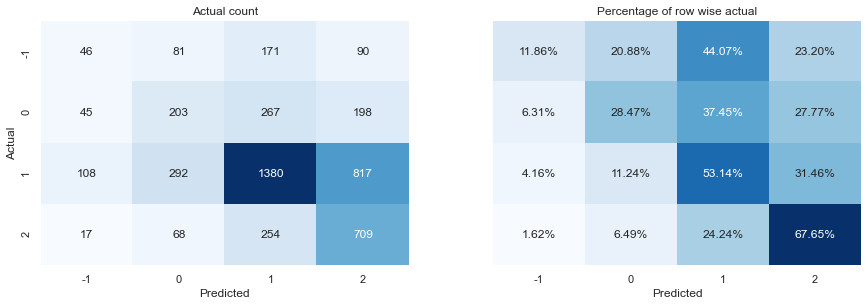

In [282]:
scoring_metrics(y_test, y_pred_dt)

DISCUSSION OF RESULTS

In [102]:
dt_metrics = valuations(y_test, y_pred_dt)

### Neural Networks

### Summary 

## Ensemble models

### RandomForestClassifier

In [103]:
rf = RandomForestClassifier()

In [104]:
y_pred_rf = base_model(X_train_transformed, y_train, X_test_transformed, rf)

Classification Report
              precision    recall  f1-score   support

          -1       0.92      0.09      0.16       388
           0       0.58      0.28      0.38       713
           1       0.68      0.85      0.75      2597
           2       0.61      0.64      0.63      1048

    accuracy                           0.66      4746
   macro avg       0.70      0.47      0.48      4746
weighted avg       0.67      0.66      0.62      4746



Confusion Matrices


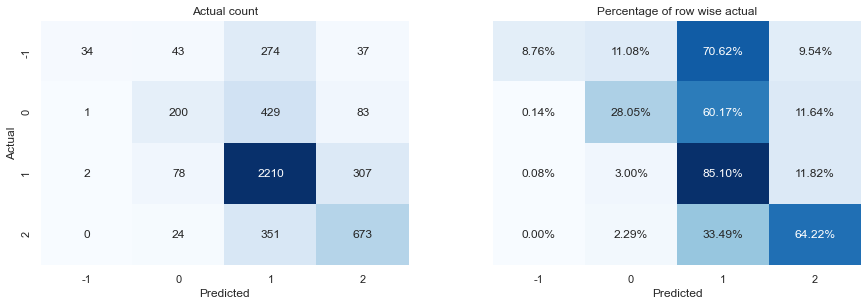

In [283]:
scoring_metrics(y_test, y_pred_rf)

DISCUSSION OF RESULTS

In [106]:
dt_metrics = valuations(y_test, y_pred_rf)

### VotingClassifier

In [284]:
classifiers = [
    ('Logistic Regression', logreg),
    ('Complement Naive Bayes', cmpnb),
    ('LinearSVC', linsvc)
]

In [285]:
vc = VotingClassifier(estimators=classifiers)

In [286]:
y_pred_vc = base_model(X_train_transformed, y_train, X_test_transformed, vc)

Classification Report
              precision    recall  f1-score   support

          -1       0.74      0.26      0.38       388
           0       0.57      0.34      0.43       713
           1       0.73      0.87      0.79      2597
           2       0.70      0.73      0.71      1048

    accuracy                           0.71      4746
   macro avg       0.69      0.55      0.58      4746
weighted avg       0.70      0.71      0.69      4746



Confusion Matrices


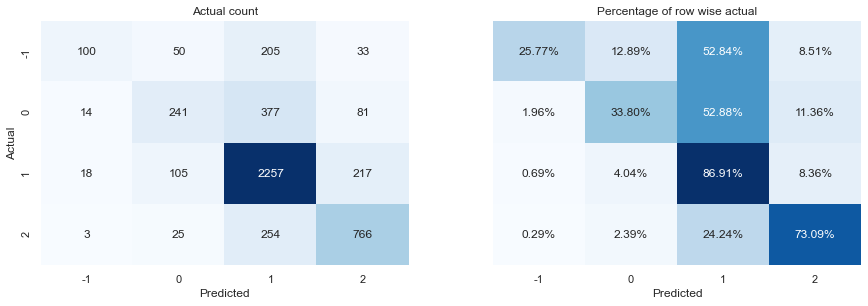

In [287]:
scoring_metrics(y_test, y_pred_vc)

In [288]:
vc_metrics = valuations(y_test, y_pred_vc)

### BaggingClassifier

In [289]:
bag_linsvc = BaggingClassifier(base_estimator=linsvc, n_jobs=-1)

In [290]:
y_pred_bag = base_model(X_train_transformed, y_train, X_test_transformed, bag_linsvc)

Classification Report
              precision    recall  f1-score   support

          -1       0.72      0.28      0.40       388
           0       0.52      0.38      0.44       713
           1       0.74      0.84      0.79      2597
           2       0.69      0.73      0.71      1048

    accuracy                           0.70      4746
   macro avg       0.67      0.56      0.58      4746
weighted avg       0.69      0.70      0.69      4746



Confusion Matrices


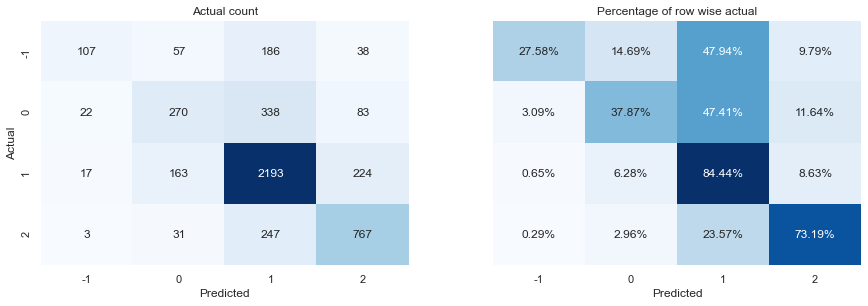

In [291]:
scoring_metrics(y_test, y_pred_bag)

In [292]:
bag_metrics = valuations(y_test, y_pred_vc)

### Summary

# Balancing the data

## Downsampling

## Upsampling

## SMOTE

### Summary

# Results

# Conclusion

The earth climates is changing very fast and differently nowadays climate changes in our earth are affecting our lives psychologically, physically and emotionally. some see it as a natural occurrence and others see it as a man made catastrophe, the fact is simple that the world climate is changing What is climate change? Climate change is the seasonal changes for a long period of time in the world. The climate patterns effect our economies and ecosystems For example, the changes in climate can affect how people, plants and animal live, such as food production and health risks.

The Earth’s climate is very broad and always changing causing a good deal concern for us as humans.However, what are the causes and effects of climate changes that affecting our lives and environment?

There are two main causes of climate changes – natural causes and human activities. Natural causes have influenced the earth’s climates such as volcanic eruptions, ocean current, the earth’s orbital changes and solar variations.

All the causes are giving a great impact for climate changes in our earth.the consequences We can see that there are three main effects on climate changes in our environment. Firstly, climate change in the world affects human health. There are so many past researches showed that climate change will leads to human health and producing diseases. Secondly, climate changes will also affect the biodiversity. Biodiversity is very important for the plants and animals to maintain their habitat and ecosystem. The climate changes have impacted the loss of biodiversity.

When we have a look at our Neutral occurrence sentiment graph each of these topics are becoming more and more relevant each day and rightfully so.This has made the “#climate” thee most talked about topic on the news and social media

The causes and effects of climate change are very clear at this point but what can we do? Firstly, the government can help the communities and businesses to reduce deforestation, plant new trees in the forest and empty land, earn sustainable livelihoods and adapt to changing climatic conditions. Next, teachers in lecturers in schools and tertiaries must give the knowledge of how to protect our earth from the very young age of the children and students. One of the reasons that caused the climate changes is the emission of carbon dioxide from the vehicles. Also, our famous political leaders and news channels also have to remove themselves from the anti class and lead by example. We ourselves can reduce the uses of vehicles and car-pooling in our daily lives.You can start practicing at home by switching off any electrical appliances when not in use this will help conserve energy

Conclusion there are many effects of climate changes that seriously affecting our environment, health and biodiversities. If we still have not take any actions to prevent the climate changes, our mother earth will be become sick more seriously.If not there will be serious environmental concerns . We need to protect our environment and give our next generation to have a better place to stay, we must always know how to prevent the climate changes such as stop cutting off the trees, save energy, car-pooling, etc. Therefore, let us keep our Mother Earth healthy

# References